<h1>はじめに</h1>

その２では、「loto6に当たりやすい目はあるのか？」について以下の手順で分析・解析していきます。<br>
1. 今までに出た目は偏りがあるか？
2. 偏りは統計的に妥当か？<br>

データの入手方法や環境の設定方法に関してはその１を参照ください。<br>
http://own-search-and-study.xyz/2016/08/02/python%E3%81%A7loto6%E3%81%AE%E3%83%87%E3%83%BC%E3%82%BF%E5%88%86%E6%9E%90%E3%82%92%E3%81%97%E3%81%A6%E3%81%BF%E3%81%9F%E3%80%80%EF%BD%9E%E3%81%9D%E3%81%AE%EF%BC%91%EF%BD%9E/

<h1>今までに出た目は偏りがあるか？</h1>

まず、ロト6の出目を確認し、どれだけ偏りがあるのかを確認しましょう。

<h2>出目の確認</h2>

早速、出目の偏りを確認していきます。

In [1]:
#Pandasを用いてデータを読み込み、データフレームに格納します。
import pandas as pd
df = pd.read_csv("loto6.csv", encoding="cp932", parse_dates=[1])
#抽選番号に係るデータだけを使う
df = df.iloc[:, 3:10]
#データ確認
df.head()

,本数字1,本数字2,本数字3,本数字4,本数字5,本数字6,ボーナス数字
0,2,8,10,13,27,30,39
1,1,9,16,20,21,43,5
2,1,5,15,31,36,38,13
3,16,18,26,27,34,40,13
4,9,15,21,23,27,28,43


ここから、meltとpivot_tableを用いて、数値ごとの出現回数が分かるように整形します。

In [2]:
#まずはpandasのmeltを用いて数値を1列の項目に変換
df = pd.melt(df)
#データ確認
df.head()

,variable,value
0,本数字1,2
1,本数字1,1
2,本数字1,1
3,本数字1,16
4,本数字1,9


In [3]:
#次にpivot-tableを用いて数値ごとの抽選回数を算出
df = pd.pivot_table(df, index='value', aggfunc='count')
df.columns = ['frequency']
#データ確認
df.head()

,frequency
value,
1,172
2,190
3,186
4,195
5,187


回数が分かったので引き続き可視化してみましょう。

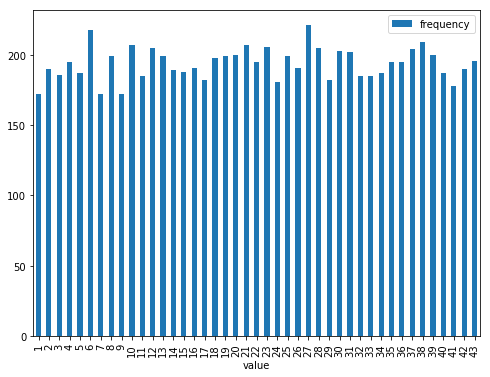

In [4]:
#棒グラフで可視化
%matplotlib inline
df.plot.bar(figsize=(8, 6))

見えにくいので並び替えを行い、加えてもう少しy軸の範囲を絞ります。

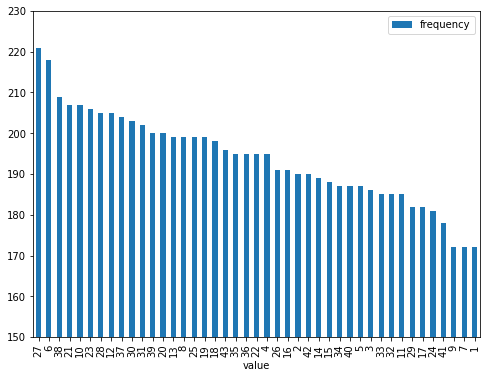

In [5]:
df.sort_values('frequency', ascending=False).plot.bar(ylim=[150, 230], figsize=(8, 6))

グラフを見たところ、よく出ている数字（6や27）は、220回程度出ているのに対し、あまり出ていない数字（1や7や9）は170回程度であり、そこそこ偏りが発生しているように見えますね。

<h2>偏りの評価</h2>

次に、1～43までの数値のことは一旦忘れ、この偏り自体を確認・評価していきます。こういう場合、横軸をfrequencyとしてヒストグラムをプロットしてみると分かりやすいです。

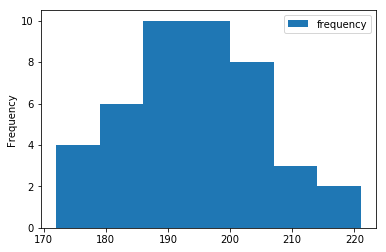

In [6]:
#ヒストグラムをプロット
df.plot.hist(bins=7)

どうやら、190～200回を分布のピークとした形状のようです。おおよそ正規分布的と仮定して、分布の平均と標準偏差を計算してみましょう。

In [7]:
#平均と標準偏差を計算
print("平均：" + "{0:.3f}".format(df.mean().values[0]))
print("標準偏差：" + "{0:.3f}".format(df.std().values[0]))

平均：193.884
標準偏差：11.365


上記の数字がこの分布の偏りの指標となります。

<h2>偏りの時系列的変化</h2>

次に、この偏りの指標（平均及び標準偏差）がloto6の歴史の中でどう評価してきたかを算出してみましょう。

まず、loto6のデータフレームを受け取り、平均と標準偏差を返すファンクションを作成します。

In [8]:
#loto6のデータフレームを受け取り、平均と標準偏差を返すファンクション
#dfがデータフレーム、iは開催回数を表す。
def getdistInfo(df, i):
    
    #指定した開催日までのデータを抽出
    df = df.ix[:i]
    
    #andasのmeltを用いて数値を1列の項目に変換
    df = pd.melt(df)
    
    #pivot-tableを用いて数値ごとの抽選回数を算出
    df = pd.pivot_table(df, index='value', aggfunc='count')
    df.columns = ['frequency']
    
    #分布の平均と標準偏差を返す
    return df.mean().values[0], df.std().values[0]

このファンクションに渡すiを増やしながらreturnを受け取ることで、偏りの時系列変化を算出することができます。

In [9]:
#データフレームを読み直す
tdf = pd.read_csv("loto6.csv", encoding="cp932", parse_dates=[1])
df = tdf.iloc[:, 3:10]

result = []
for i in df.index:
    result.append(getdistInfo(df, i))
    
result = pd.DataFrame(result, columns=['mean', 'std'], index=tdf['抽せん回'])
result.index.name = 'times'

可視化してみましょう。

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A0A2234DD8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001A0A24624A8>], dtype=object)

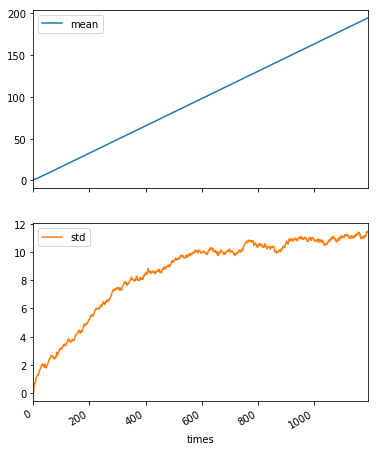

In [10]:
result.plot(subplots=True, figsize=(6, 8))

抽選回数で規格化するとこんな感じ。

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A0A246E9B0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001A0A25B30F0>], dtype=object)

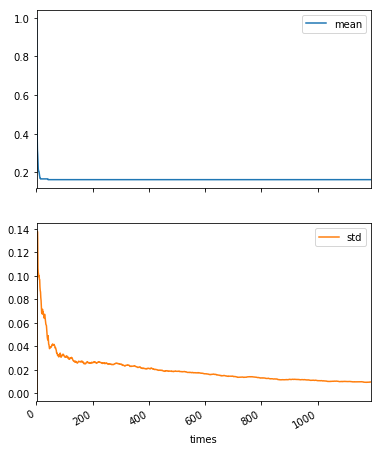

In [11]:
(result.T / result.index.values).T.plot(subplots=True, figsize=(6, 8))

平均についてはほとんど変化がなく、標準偏差はゆっくりと減っていくという結果のようです。

<h1>偏りは統計的に妥当か？</h1>

次に、この偏りが統計的に妥当かを評価していきます。loto6が本当に完全なランダムであれば、1～43のうち7つの数字を無作為に抽出するシミュレーションを、開催回数分行って計算した偏りの指標（平均値及び標準偏差）が、上記で算出した値とほぼ一致するはずですので、それを検証します。<br>
なお、このような確率モデルを使った無作為なシミュレーションにより何らかの指標を評価することを「モンテカルロシミュレーション」と呼びます。

<h2>モンテカルロシミュレーションの方法</h2>

本ケースにおいては1～43までの配列から7つの数字を無作為に選択することに相当します。

In [12]:
#numpyを使ってモンテカルロシミュレーション
import numpy as np

#プログラムに再現性を持たせるため乱数のシードを設定
np.random.seed(0)

#1～43の数字から重複なしで7つの数字を選択
data = np.random.choice(range(1, 44), replace=False, size=7)
data.sort()

#結果確認
print(data)

[ 5 11 26 28 29 31 37]


<h2>モンテカルロシミュレーション結果との比較</h2>

これを所定の回数繰り返して仮想的なloto6の結果を作りましょう。

In [13]:
datas = []
numbers = list(range(1, 44))
np.random.seed(0)

for i in df.index:
    data = np.random.choice(numbers, replace=False, size=7)
    data.sort()
    datas.append(data)
    
vloto6 = pd.DataFrame(datas, index=df.index, columns=df.columns)

#結果確認
vloto6.head()

,本数字1,本数字2,本数字3,本数字4,本数字5,本数字6,ボーナス数字
0,5,11,26,28,29,31,37
1,13,14,17,22,23,28,31
2,2,9,20,27,31,38,40
3,6,8,10,19,29,30,39
4,1,6,11,13,15,32,35


得られた結果を先ほど作ったgetdistInfoを用いて可視化してみます。

In [14]:
vresult = []
for i in df.index:
    vresult.append(getdistInfo(vloto6, i))
    
vresult = pd.DataFrame(vresult, columns=['mean', 'std'], index=tdf['抽せん回'])
vresult.index.name = 'times'

抽選回数で規格化した結果で見てみましょう。

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A0A25E4438>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001A0A24216A0>], dtype=object)

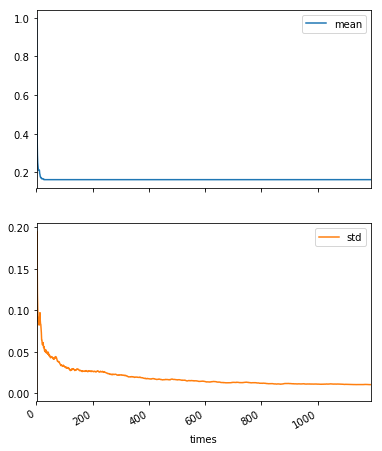

In [15]:
(vresult.T / vresult.index.values).T.plot(subplots=True, figsize=(6, 8))

meanがほぼ同じことは分かりますが、これだけだとstdは良く分からないので、stdに絞って重ねて書いてみます。

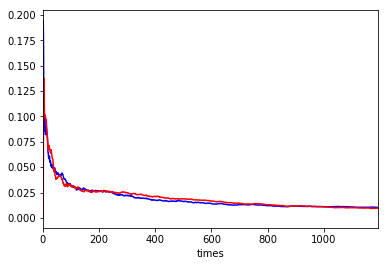

In [16]:
#シミュレーションを青、実際を赤で描画
ax = (vresult.T / vresult.index.values).T['std'].plot(c='b')
(result.T / result.index.values).T['std'].plot(c='r', ax=ax)

実績（赤）とシミュレーション（青）の結果はほぼ等しく、やはりloto6はランダムと言えそうです。

<h2>100回のモンテカルロシミュレーション結果との比較</h2>

せっかくなのでモンテカルロシミュレーションを繰り返して、より妥当性を確認してみましょう。まずモンテカルロシミュレーションから統計値を出す部分をファンクション化します。

In [17]:
#loto6のデータフレームを受け取り、標準偏差の時系列変化を返すファンクション
#dfがloto6の実際の結果の抽出番号のデータフレーム、tdfはそれ以外も含めたもの。jは乱数のシードを表す。
def loto6simulation(df, tdf, j):
    
    #仮想的なloto6の結果を作成
    datas = []
    numbers = list(range(1, 44))
    np.random.seed(j)

    for i in df.index:
        data = np.random.choice(numbers, replace=False, size=7)
        data.sort()
        datas.append(data)

    vloto6 = pd.DataFrame(datas, index=df.index, columns=df.columns)
    
    #時系列的な標準偏差の変化を算出
    vresult = []
    for i in df.index:
        vresult.append(getdistInfo(vloto6, i))

    vresult = pd.DataFrame(vresult, columns=['mean', 'std'], index=tdf['抽せん回'])
    vresult.index.name = 'times'
    
    return (vresult.T / vresult.index.values).T['std']

jを1万回繰り返せばその分の結果が返ってきます。ただし、繰り返し回数が多いので、並列計算を使ってみましょう。

In [18]:
#ライブラリのインポート
from joblib import Parallel, delayed

#これがないとjoblibが止まるので入れておく
if __name__ == "__main__":
    #n_jobsがコア数
    vresults = Parallel(n_jobs=1, verbose=1)([delayed(loto6simulation)(df, tdf, j) for j in range(100)])
    
    #concatを使って結合
    vresults = pd.concat(vresults, axis=1)
    
    #結果確認
    vresults.head()

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  6.6min finished


先ほどと同様の手順で可視化してみましょう。

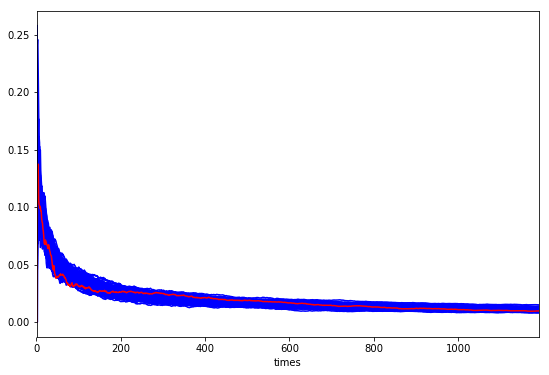

In [19]:
ax = vresults.plot(legend=False, c='b', figsize=(9, 6))
(result.T / result.index.values).T['std'].plot(c='r', ax=ax)

赤い線（実際）は青い線（シミュレーション）のなかにすっぽり埋まっていますね。やはり完全にランダムと言ってよさそうです。

<h1>まとめ</h1>

データの確認とモンテカルロシミュレーションを用いた検証により以下のことが分かりました。ロト6は、偏りがありそうではありますが、基本ランダムと言えそうです。
1. 今までに出た目は偏りがあるか？<br>　
⇒よく出ている数字（6や27）は、220回程度出ているのに対し、あまり出ていない数字（1や7や9）は170回程度であり、偏りがありそうに見える
2. 偏りは統計的に妥当か？<br>
⇒分布のばらつきはランダムを仮定した場合のシミュレーション結果とほぼ一致しており、統計的に妥当な偏り＝ランダムで予測不可

その３では、当たった数字と賞金の関係を分析し、いつどんな数字を選択すると期待値が上がるのか、ということを分析しようと思います。